# Climate policy widget mock-ups

This notebook illustrates some options on how to visualize emissions and mitigation data for the new widget

In [1]:
#import libraries
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Rectangle

## Import mitigation and emissions data
Load from custom CSVs made from the indicated columns of the excel files provided by the client.

In [3]:
policy_data = pd.read_csv('../../datasets/Policy_data.csv')
metadata_policy = {'ISO':policy_data.columns[0] , 'Country':policy_data.columns[1], 'NDC_Blurb':policy_data.columns[2], 'Climate_vulnerability':policy_data.columns[3],
                    'Avoided_loss':policy_data.columns[4], 'Annual_opportunity':policy_data.columns[5]}
policy_data.columns = ['ISO', 'Country', 'NDC_Blurb', 'Climate_vulnerability', 'Avoided_loss', 'Annual_opportunity']
policy_data


,ISO,Country,NDC_Blurb,Climate_vulnerability,Avoided_loss,Annual_opportunity
0,AGO,Angola,"""Angola plans to reduce GHG emissions up to 35...",106.67,0.24,0.013613
1,ATG,Antigua & Barbuda,"Conditional Adaptation Targets "" (1) By 2025, ...",74.50,0.00,0.000332
2,AUS,Australia,"""Under a Paris Agreement applicable to all, Au...",52.00,0.77,0.789309
3,BHR,Bahrain,The Kingdom of Bahrain communicated in its NDC...,125.00,0.00,0.000003
4,BGD,Bangladesh,"""The NDC of Bangladesh consists of the followi...",25.00,0.08,0.323811
...,...,...,...,...,...,...
96,VUT,Vanuatu,"""The mitigation contribution for the Vanuatu N...",54.67,0.00,0.000233
97,VEN,Venezuela,Venezuela intends to implement a National Miti...,67.50,0.97,0.282058
98,VNM,Vietnam,"""With domestic resources, by 2030 Viet Nam wil...",31.33,0.65,0.408448
99,VGB,"Virgin Islands, British",NaN,NaN,0.00,0.000011


In [4]:
metadata_policy

{'ISO': 'iso',
 'Country': 'name',
 'NDC_Blurb': 'NDC Blurb',
 'Climate_vulnerability': 'Climate Vulnerability Rank (index)',
 'Avoided_loss': 'Avoided loss (Emissions from Mangrove loss) (MtCO2e yr-1)',
 'Annual_opportunity': 'Annual Opportunity from Restoration (MtCO2e yr-1)'}

In [26]:
emissions = pd.read_csv('../../datasets/Emissions.csv')
metaadata_emissions = {'Country':emissions.columns[0],'ISO':emissions.columns[1], 'Process':emissions.columns[2], 'Emissions':emissions.columns[3]}
emissions.columns = ['Country','ISO', 'Process', 'Emissions']
emissions

,Country,ISO,Process,Emissions
0,Angola,AGO,LUC-Crops,141.218004
1,Angola,AGO,LUC-Pasture,16.072787
2,Angola,AGO,Wood Harvest,9.329425
3,Angola,AGO,Fertilizer,0.067510
4,Angola,AGO,Enteric Ferm.,5.481993
...,...,...,...,...
1282,Zimbabwe,ZWE,Manure-Pasture,3.058157
1283,Zimbabwe,ZWE,Residues,0.128225
1284,Zimbabwe,ZWE,Burning,0.169136
1285,Zimbabwe,ZWE,Peatland,0.000000


## Plot data from test areas (Indonesia and Brazil)

In [6]:
#Get a test dataset for Indonesia
test_emissions = emissions[emissions['Country'] == 'Indonesia'].copy()
test_emissions.set_index('Process', inplace=True)
test_emissions = test_emissions[test_emissions['Emissions'] >0]
test_emissions.sort_values('Emissions', ascending = False)

,Country,ISO,Emissions
Process,,,
LUC-Crops,Indonesia,IDN,1049.824130
Peatland,Indonesia,IDN,533.139507
Wood Harvest,Indonesia,IDN,120.806335
Rice,Indonesia,IDN,91.263859
Enteric Ferm.,Indonesia,IDN,29.005775
Fertilizer,Indonesia,IDN,15.411961
Manure-Pasture,Indonesia,IDN,8.195982
Manure Management,Indonesia,IDN,7.264015
Residues,Indonesia,IDN,4.952787


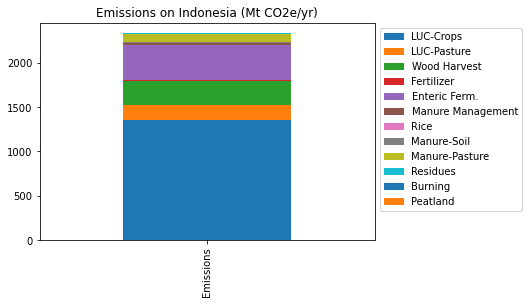

In [9]:
pd.DataFrame(test_emissions['Emissions']).T.plot.bar(stacked=True)
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.title('Emissions on Indonesia (Mt CO2e/yr)')
plt.show()

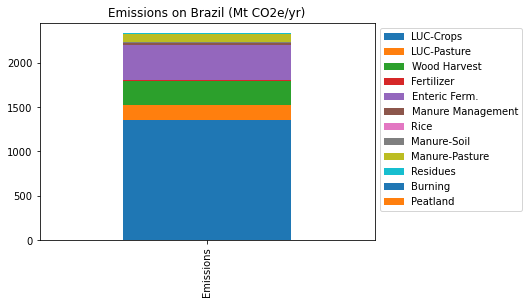

In [10]:
# Test plot for Brazil data
test_emissions = emissions[emissions['Country'] == 'Brazil'].copy()
test_emissions.set_index('Process', inplace=True)
test_emissions = test_emissions[test_emissions['Emissions'] >0]
pd.DataFrame(test_emissions['Emissions']).T.plot.bar(stacked=True)
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.title('Emissions on Brazil (Mt CO2e/yr)')
plt.show()

In [44]:
country='Indonesia'
test_emissions = emissions[emissions['Country'] == country].copy()
test_emissions.set_index('Process', inplace=True)
test_emissions = test_emissions[test_emissions['Emissions'] >0]

test_policy = policy_data[policy_data['Country'] == country][['Avoided_loss', 'Annual_opportunity']]
test_policy

,Avoided_loss,Annual_opportunity
40,34.3,4.379141


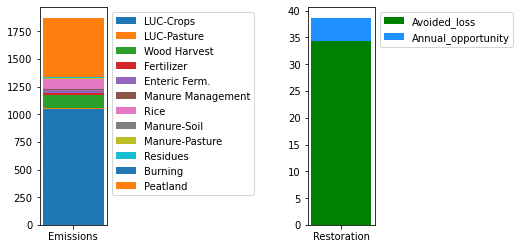

In [71]:
plt.subplot(1,2,1)
bot = 0
rect = Rectangle((0, 0),0, 100)
for p in test_emissions.index:
    #print(f'{p} is {test_emissions.loc[p, "Emissions"]}')
    plt.bar('Emissions',test_emissions.loc[p, "Emissions"], bottom = bot) 
    plt.ylim(0, test_emissions['Emissions'].sum()+100)
    plt.legend(test_emissions.index, bbox_to_anchor=(1,1), loc="upper left")
    bot=bot+test_emissions.loc[p, "Emissions"]
    #plt.add_patch(rect)   
    
plt.subplot(1,2,2)
plt.bar('Restoration', test_policy['Avoided_loss'], color = 'green')
plt.bar('Restoration', test_policy['Annual_opportunity'],color = 'dodgerblue', bottom = test_policy['Avoided_loss']+0.01)
plt.legend(['Avoided_loss', 'Annual_opportunity'], bbox_to_anchor=(1,1), loc="upper left")

plt.subplots_adjust(wspace=3)


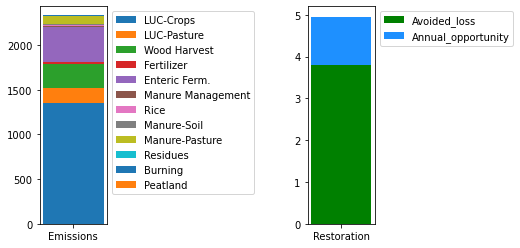

In [72]:
country='Brazil'
test_emissions = emissions[emissions['Country'] == country].copy()
test_emissions.set_index('Process', inplace=True)
test_emissions = test_emissions[test_emissions['Emissions'] >0]

test_policy = policy_data[policy_data['Country'] == country][['Avoided_loss', 'Annual_opportunity']]

plt.subplot(1,2,1)
bot = 0
rect = Rectangle((0, 0),0, 100)
for p in test_emissions.index:
    #print(f'{p} is {test_emissions.loc[p, "Emissions"]}')
    plt.bar('Emissions',test_emissions.loc[p, "Emissions"], bottom = bot) 
    plt.ylim(0, test_emissions['Emissions'].sum()+100)
    plt.legend(test_emissions.index, bbox_to_anchor=(1,1), loc="upper left")
    bot=bot+test_emissions.loc[p, "Emissions"]
    #plt.add_patch(rect)   
    
plt.subplot(1,2,2)
plt.bar('Restoration', test_policy['Avoided_loss'], color = 'green')
plt.bar('Restoration', test_policy['Annual_opportunity'],color = 'dodgerblue', bottom = test_policy['Avoided_loss']+0.01)
plt.legend(['Avoided_loss', 'Annual_opportunity'], bbox_to_anchor=(1,1), loc="upper left")

plt.subplots_adjust(wspace=3)

## Correct data based on mangrove extent  
1. Load GADM polygon and calculate total country size  
2. Load mangrove areas data (processed) and calculate % of area of the country that is mangroove  
3. Get proportion of emissions relative to the mangrove extent
4. Compare with mitigation data

### 1. Country area from GADM

In [13]:
ind_poly = emissions = gpd.read_file('../../datasets/gadm36_IDN_shp/gadm36_IDN_1.shp')
ind_poly.head(2)

,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,geometry
0,IDN,Indonesia,IDN.1_1,Aceh,None,None,Propinisi,Province,11,ID.AC,"MULTIPOLYGON (((96.66509 2.12018, 96.66765 2.1..."
1,IDN,Indonesia,IDN.2_1,Bali,None,None,Propinisi,Province,51,ID.BA,"MULTIPOLYGON (((115.59464 -8.81672, 115.59444 ..."


In [14]:
ind_poly.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [15]:
ind_poly = ind_poly.to_crs({'init': 'epsg:3857'})
ind_poly.head(2)

/opt/conda/lib/python3.8/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,geometry
0,IDN,Indonesia,IDN.1_1,Aceh,None,None,Propinisi,Province,11,ID.AC,"MULTIPOLYGON (((10760708.871 236071.068, 10760..."
1,IDN,Indonesia,IDN.2_1,Bali,None,None,Propinisi,Province,51,ID.BA,"MULTIPOLYGON (((12867935.908 -985369.517, 1286..."


In [17]:
ind_poly['area'] = ind_poly['geometry'].area/ 10**6
total_area = ind_poly['area'].sum()
print(f'Total area is {total_area} km2')

Total area is 1912140.790954544 km2


### 2. Mangrove area

In [19]:
mang_data = pd.read_csv('../../datasets/Mangrove_Protection_Calculations_20210430.csv')
mang_data = mang_data[(mang_data['Country'] == 'Indonesia')][['Country', 'Total Mangrove 2010']]
mang_data

,Country,Total Mangrove 2010
51,Indonesia,27074.904571


In [24]:
mang_area = mang_data['Total Mangrove 2010'].sum()/100 # Convert from ha to km2
prop_size = mang_area/total_area
print(f'Country area is {total_area.round(2)} km2')
print(f'Magrove area is {mang_area.round(2)} km2')
print(f'Mangrove area is {round(prop_size*100, 3)}% of the country')

Country area is 1912140.79 km2
Magrove area is 270.75 km2
Mangrove area is 0.014% of the country


### 3. Proportion of emission relative to mangrove %

In [27]:
country='Indonesia'
test_emissions = emissions[emissions['Country'] == country].copy()
test_emissions.set_index('Process', inplace=True)
test_emissions = test_emissions[test_emissions['Emissions'] >0]

test_policy = policy_data[policy_data['Country'] == country][['Avoided_loss', 'Annual_opportunity']]

#Proportional emissions
test_emissions['Emissions'] = test_emissions['Emissions']*prop_size


### 4. Plot corrected data

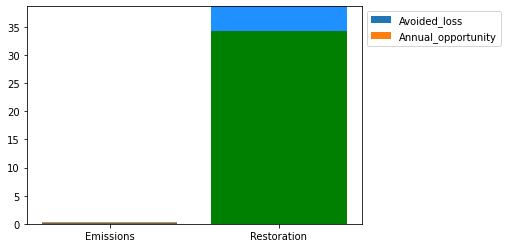

In [31]:
bot = 0
max_val = max([test_emissions['Emissions'].sum()+1, test_policy['Avoided_loss'].sum()+test_policy['Annual_opportunity'].sum()])
for p in test_emissions.index:
    #print(f'{p} is {test_emissions.loc[p, "Emissions"]}')
    plt.bar('Emissions',test_emissions.loc[p, "Emissions"], bottom = bot) 
    plt.ylim(0, max_val)
    plt.legend(test_emissions.index, bbox_to_anchor=(1,1), loc="upper left")
    bot=bot+test_emissions.loc[p, "Emissions"]
    #plt.add_patch(rect)   
    

plt.bar('Restoration', test_policy['Avoided_loss'], color = 'green')
plt.bar('Restoration', test_policy['Annual_opportunity'],color = 'dodgerblue', bottom = test_policy['Avoided_loss']+0.01)
plt.legend(['Avoided_loss', 'Annual_opportunity'], bbox_to_anchor=(1,1), loc="upper left")
